In [1]:
import pandas as pd
import numpy

In [2]:
names1880 = pd.read_csv('/Users/swapnil/pydata-book/datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])

In [127]:
names1880[:10]

name sex  births
0       Mary   F    7065
1       Anna   F    2604
2       Emma   F    2003
3  Elizabeth   F    1939
4     Minnie   F    1746
5   Margaret   F    1578
6        Ida   F    1472
7      Alice   F    1414
8     Bertha   F    1320
9      Sarah   F    1288

In [128]:
# names1880.groupby('sex').births.sum()

Concatinating different year files

*DONOT FORGET TO CONVERT TO DATA FRAME USING pd.DATAFRAME or you wont be able to use the functions

In [129]:
years = range(1880,2011)
pieces = []
columns = ['name','sex','births']
for year in years:
    path = '/Users/swapnil/pydata-book/datasets/babynames/yob%d.txt'%year
    frame = pd.read_csv(path,names = columns)
    frame['year'] = year
    pieces.append(frame)
    names = pd.concat(pieces, ignore_index=True)
    
names = pd.DataFrame(names)

In [130]:
names[0:10]

name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880
5   Margaret   F    1578  1880
6        Ida   F    1472  1880
7      Alice   F    1414  1880
8     Bertha   F    1320  1880
9      Sarah   F    1288  1880

In [131]:
names.head()

name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880

In [132]:
total_births = names.pivot_table('births',index='year',columns ='sex',aggfunc = sum)
total_births.tail()

sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

<Axes: xlabel='year'>

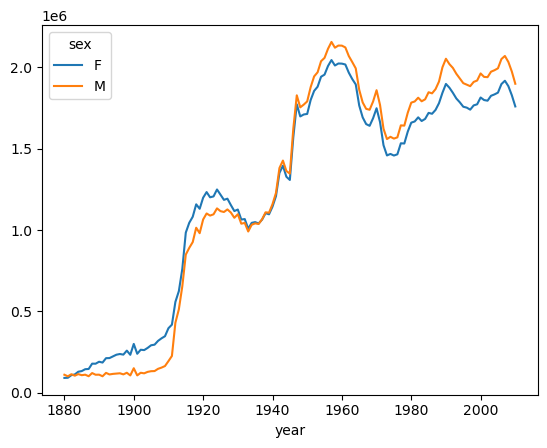

In [133]:
total_births.plot()

SIMILAR TO SQL GROUP BY:

In [138]:
sex = names.groupby(['year','sex']).births.sum()
sex.head()

year  sex
1880  F       90993
      M      110493
1881  F       91955
      M      100748
1882  F      107851
Name: births, dtype: int64